
$$y=2x_1-3.4x_2+4.2$$

In [55]:
import torch
import numpy as np
import pandas as pd

data=pd.read_csv("../data/mine/linear_test.csv")

num=3
X=np.ones((num,3))
X[:,:2]=data.values[:num,1:3]
Y=data.values[:num,3]
x=torch.tensor([1.,1.,1.],dtype=torch.float64)
x.requires_grad_(True)
X=torch.tensor(X)
Y=torch.tensor(Y)
dx=0.03
for i in range(100):
    loss=(torch.matmul(X,x)-Y)@(torch.matmul(X,x)-Y)
    print(loss.data)
    loss.backward()
    with torch.no_grad():#更新时不用计算梯度
        x-=x.grad*dx
        x.grad.zero_()  
x

tensor(134.4281, dtype=torch.float64)
tensor(59.0233, dtype=torch.float64)
tensor(27.2504, dtype=torch.float64)
tensor(13.5684, dtype=torch.float64)
tensor(7.4722, dtype=torch.float64)
tensor(4.6159, dtype=torch.float64)
tensor(3.1835, dtype=torch.float64)
tensor(2.4041, dtype=torch.float64)
tensor(1.9421, dtype=torch.float64)
tensor(1.6454, dtype=torch.float64)
tensor(1.4418, dtype=torch.float64)
tensor(1.2943, dtype=torch.float64)
tensor(1.1826, dtype=torch.float64)
tensor(1.0948, dtype=torch.float64)
tensor(1.0236, dtype=torch.float64)
tensor(0.9642, dtype=torch.float64)
tensor(0.9132, dtype=torch.float64)
tensor(0.8684, dtype=torch.float64)
tensor(0.8284, dtype=torch.float64)
tensor(0.7920, dtype=torch.float64)
tensor(0.7585, dtype=torch.float64)
tensor(0.7273, dtype=torch.float64)
tensor(0.6980, dtype=torch.float64)
tensor(0.6703, dtype=torch.float64)
tensor(0.6440, dtype=torch.float64)
tensor(0.6189, dtype=torch.float64)
tensor(0.5950, dtype=torch.float64)
tensor(0.5721, dtype=to

tensor([ 2.1719, -3.0916,  4.1528], dtype=torch.float64, requires_grad=True)

In [56]:
x=torch.tensor([1.,1.,1.],dtype=torch.float64)
x.requires_grad_(True)
X=torch.tensor(X)
Y=torch.tensor(Y)
dx=0.01
lamb=0.1
for i in range(100):
    loss=(torch.matmul(X,x)-Y)@(torch.matmul(X,x)-Y)+lamb*x.norm(1)**2
    print(loss.data)
    loss.backward()
    with torch.no_grad():
        x-=x.grad*dx
        x.grad.zero_()  
x

tensor(135.3281, dtype=torch.float64)
tensor(106.8636, dtype=torch.float64)
tensor(84.7176, dtype=torch.float64)
tensor(67.4702, dtype=torch.float64)
tensor(54.3620, dtype=torch.float64)
tensor(44.5832, dtype=torch.float64)
tensor(37.0323, dtype=torch.float64)
tensor(31.1914, dtype=torch.float64)
tensor(26.6642, dtype=torch.float64)
tensor(23.1471, dtype=torch.float64)
tensor(20.4075, dtype=torch.float64)
tensor(18.2672, dtype=torch.float64)
tensor(16.5892, dtype=torch.float64)
tensor(15.2686, dtype=torch.float64)
tensor(14.2248, dtype=torch.float64)
tensor(13.3958, dtype=torch.float64)
tensor(12.7338, dtype=torch.float64)
tensor(12.2021, dtype=torch.float64)
tensor(11.7723, dtype=torch.float64)
tensor(11.4226, dtype=torch.float64)
tensor(11.1358, dtype=torch.float64)
tensor(10.8989, dtype=torch.float64)
tensor(10.7017, dtype=torch.float64)
tensor(10.5361, dtype=torch.float64)
tensor(10.3960, dtype=torch.float64)
tensor(10.2764, dtype=torch.float64)
tensor(10.1734, dtype=torch.float64)

C:\Users\19234\AppData\Local\Temp\ipykernel_63324\536956030.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X=torch.tensor(X)
C:\Users\19234\AppData\Local\Temp\ipykernel_63324\536956030.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y=torch.tensor(Y)


tensor([ 2.6022, -2.3774,  3.9654], dtype=torch.float64, requires_grad=True)

In [57]:
T=np.linspace(-1,2,100)

def find_norm(t):
    t1=np.array([t,t-1,t-1])
    return [np.linalg.norm(t1,0),np.linalg.norm(t1,1),np.linalg.norm(t1,2)]
ans=np.array([find_norm(t) for t in T])
ans

array([[3.        , 5.        , 3.        ],
       [3.        , 4.90909091, 2.94952954],
       [3.        , 4.81818182, 2.89913068],
       [3.        , 4.72727273, 2.8488072 ],
       [3.        , 4.63636364, 2.79856319],
       [3.        , 4.54545455, 2.74840299],
       [3.        , 4.45454545, 2.69833129],
       [3.        , 4.36363636, 2.64835309],
       [3.        , 4.27272727, 2.59847381],
       [3.        , 4.18181818, 2.54869923],
       [3.        , 4.09090909, 2.49903563],
       [3.        , 4.        , 2.44948974],
       [3.        , 3.90909091, 2.40006887],
       [3.        , 3.81818182, 2.35078089],
       [3.        , 3.72727273, 2.30163435],
       [3.        , 3.63636364, 2.25263849],
       [3.        , 3.54545455, 2.20380337],
       [3.        , 3.45454545, 2.15513993],
       [3.        , 3.36363636, 2.10666004],
       [3.        , 3.27272727, 2.05837669],
       [3.        , 3.18181818, 2.01030404],
       [3.        , 3.09090909, 1.96245756],
       [3.

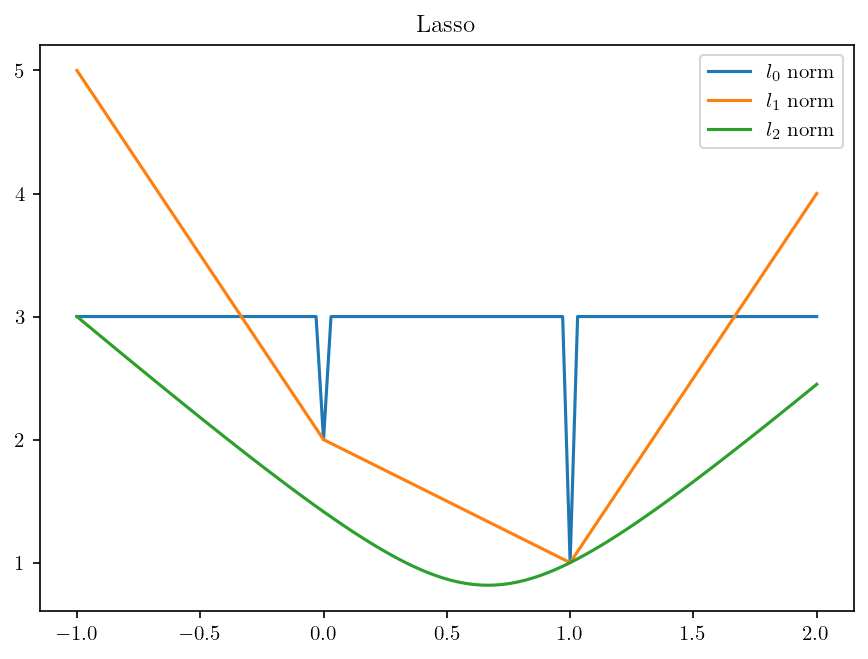

In [58]:
import matplotlib.pyplot as plt

# plt.rc("font",family='MicroSoft YaHei')
plt.rcParams['text.usetex'] = True
plt.rc("font",family='Times New Roman')

fig = plt.figure(num=1,figsize=(7,5), facecolor='white',dpi=150)

plt.plot(T,ans[:,0],label=r"$ l_0 \; \rm{norm}$ ")
plt.plot(T,ans[:,1],label=r"$ l_1 \; \rm{norm}$ ")
plt.plot(T,ans[:,2],label=r"$ l_2 \; \rm{norm}$ ")
plt.title(r"Lasso")
plt.legend()

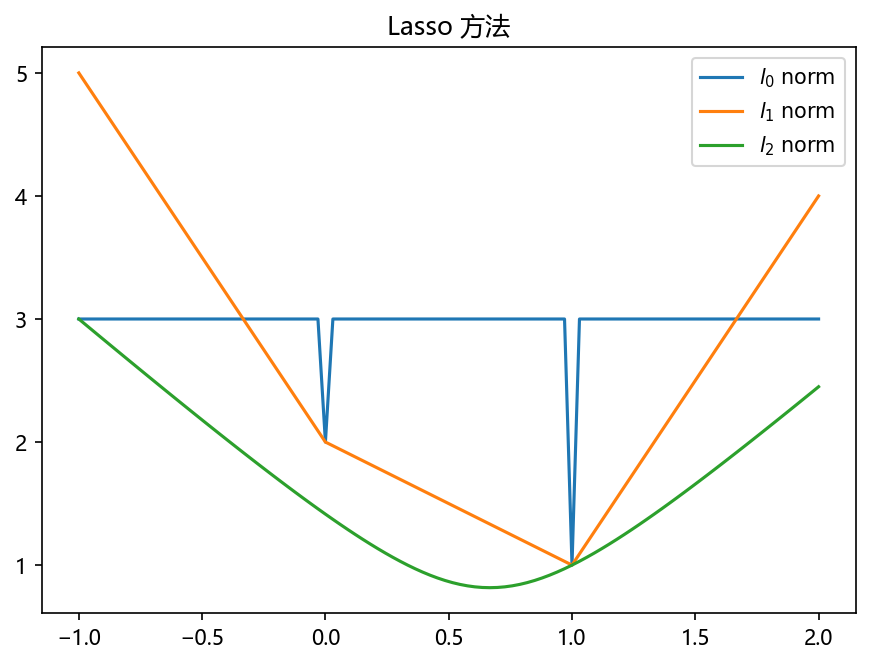

In [59]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False
plt.rc("font",family='MicroSoft YaHei')

fig = plt.figure(num=1,figsize=(7,5), facecolor='white',dpi=150)

plt.plot(T,ans[:,0],label=r"$ l_0 \; \rm{norm}$ ")
plt.plot(T,ans[:,1],label=r"$ l_1 \; \rm{norm}$ ")
plt.plot(T,ans[:,2],label=r"$ l_2 \; \rm{norm}$ ")
plt.title(r"Lasso 方法")
plt.legend()

In [60]:
house_price=data=pd.read_csv("../data/HousingData.csv")
house_price.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [61]:
house_price1=house_price.dropna().reset_index()
del house_price1["index"]
house_price1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso###导入岭回归算法
from sklearn.metrics import r2_score
train=house_price1.drop(["MEDV"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(train,house_price1["MEDV"],random_state=23)
lasso=Lasso(alpha=10,max_iter=10)
lasso.fit(X_train,y_train)
print("Lasso训练模型得分："+str(r2_score(y_train,lasso.predict(X_train))))#训练集
print("Lasso待测模型得分："+str(r2_score(y_test,lasso.predict(X_test))))#待测集

Lasso训练模型得分：0.5509444341547305
Lasso待测模型得分：0.48442465734801443


In [63]:
lasso.predict(X_test.loc[[139]])
#[[ ]]是为了指定一个包含单个元素的列表，以确保返回的结果是一个DataFrame而不是一个Series

array([22.69385529])

In [64]:
X_test.iloc[[0]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
139,0.13914,0.0,4.05,0.0,0.51,5.572,88.5,2.5961,5,296,16.6,396.9,14.69


In [65]:
#loc方法基于标签索引而不是位置索引
X_test.loc[[139]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
139,0.13914,0.0,4.05,0.0,0.51,5.572,88.5,2.5961,5,296,16.6,396.9,14.69


In [66]:
y_test.loc[139]

23.1

In [68]:
lasso.coef_

array([-0.        ,  0.04756067, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.0135952 ,
       -0.        ,  0.00732988, -0.46243069])